In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

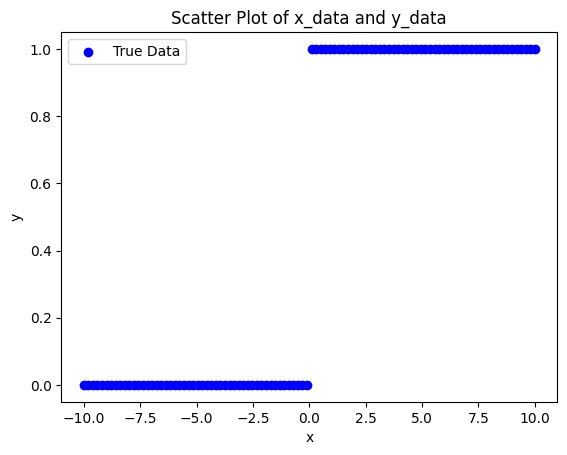

In [31]:
# 데이터 생성

np.random.seed(0)
x_data = np.linspace(-10, 10, 100)  # 입력 데이터 (100개의 점)
y_data = (x_data > 0).astype(float)  # 0보다 크면 1, 작으면 0

print(x_data, y_data)


# 데이터 산점도 그리기
plt.scatter(x_data, y_data, color='blue', label="True Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x_data and y_data")
plt.legend()
plt.show()

In [32]:
# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 예측 함수
def predict(x, w, b):
    z = w * x + b
    return sigmoid(z)

# 손실 함수 (크로스 엔트로피) 계산
def cross_entropy_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# 모델 초기화
w = np.random.randn()  # 가중치 초기값
b = np.random.randn()  # 절편 초기값
learning_rate = 0.01  # 학습률
num_epochs = 1000  # 학습 반복 횟수

print(w,b)



1.764052345967664 0.4001572083672233


In [33]:
# 경사하강법을 사용한 학습
loss_values = []
for epoch in range(num_epochs):
    # 예측값 계산
    y_pred = predict(x_data, w, b)
    
    # 손실 계산
    loss = cross_entropy_loss(y_data, y_pred)
    loss_values.append(loss)
    
    if epoch ==1:
            w1=w
            b1=b
    
    # 미분을 통한 기울기 계산 (크로스 엔트로피의 w, b에 대한 편미분)
    dw = np.mean((y_pred - y_data) * x_data)
    db = np.mean(y_pred - y_data)
    
    # 가중치 및 절편 업데이트
    w = w - learning_rate * dw
    b = b - learning_rate * db
    # 100번마다 손실 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")
        print(w,b)



Epoch 100/1000, Loss: 0.0474
1.7911288494688942 0.389165784578281
Epoch 200/1000, Loss: 0.0466
1.8173500223075847 0.37863203565910586
Epoch 300/1000, Loss: 0.0459
1.842780803411411 0.368526123628344
Epoch 400/1000, Loss: 0.0452
1.8674786625197919 0.3588211038964387
Epoch 500/1000, Loss: 0.0445
1.8914947243929063 0.3494925434686595
Epoch 600/1000, Loss: 0.0439
1.9148746869220066 0.34051820259452414
Epoch 700/1000, Loss: 0.0433
1.9376595772100675 0.3318777672875215
Epoch 800/1000, Loss: 0.0427
1.9598863790177647 0.32355262300528403
Epoch 900/1000, Loss: 0.0422
1.9815885571634766 0.31552566191442005
Epoch 1000/1000, Loss: 0.0417
2.00279649868624 0.30778111777187006


In [34]:
print()

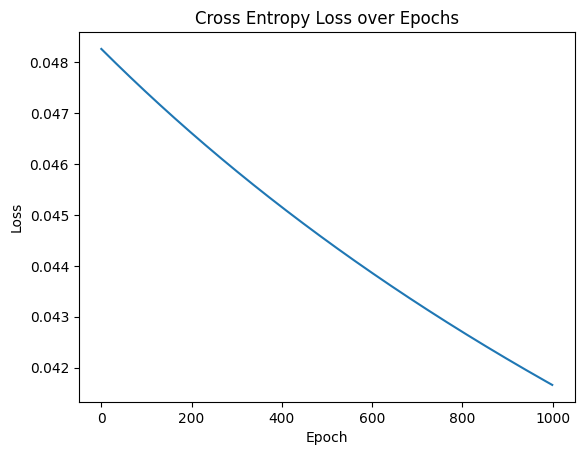

In [35]:


# 학습 결과 시각화
plt.plot(range(num_epochs), loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Cross Entropy Loss over Epochs")
plt.show()

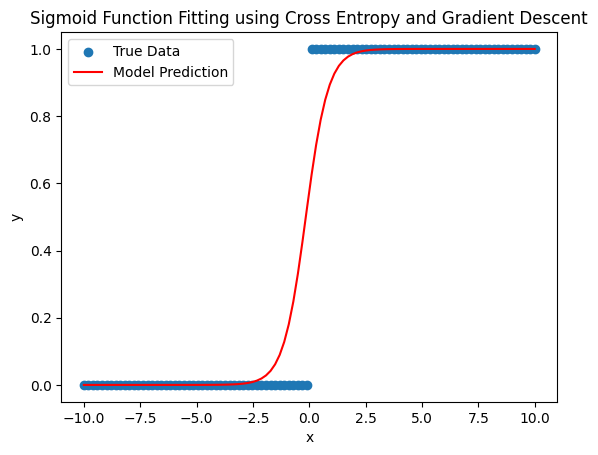

In [36]:
# 예측 결과 시각화
y_pred_final = predict(x_data, w, b)
plt.scatter(x_data, y_data, label="True Data")
plt.plot(x_data, y_pred_final, color="red", label="Model Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function Fitting using Cross Entropy and Gradient Descent")
plt.legend()
plt.show()
